

# Project: Investigate a Dataset (IMBD Dataset)

## Table of Contents
<ul>
<li><a href="#import">Importing essensial libraries</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='import'></a>
## Importing essensial libraries

In [2]:
# Importing Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Importing dataset
df  = pd.read_csv('tmdb-movies.csv')

# Visualize first lines in the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Investigating data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [6]:
df['tagline'].head()

0                The park is open.
1               What a Lovely Day.
2       One Choice Can Destroy You
3    Every generation has a story.
4              Vengeance Hits Home
Name: tagline, dtype: object

In [7]:
df['keywords'].head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

### Data Cleaning

#### Quality issue
 - Genres have multiple values in the same cell, for the sake of simplifying the data we will take only the first value.

#### Drop unnecessary columns as they would not be beneficial in our analysis
  - id and imdb_id columns
  - budget and revenue column (It's enough to take the adjusted value in this analysis)
  - homepage
  - keywords
  - overview
  - release_date

#### Columns not to be dropped to be used in analysis
  - Despite tagline have null values they might give some interesting insights


##### Copy Data

In [8]:
df_clean = df.copy()

##### Removing unnecessary columns


In [9]:
df_clean.drop(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'release_date'], axis = 1, inplace = True)

##### Split genres

In [10]:
df_clean['genre'] = df_clean.genres.str.split("|", expand = True)[0]
df_clean.drop('genres', axis = 1, inplace = True)

In [11]:
df_clean.head()

,popularity,original_title,cast,director,tagline,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


Text(0.5, 1.08, 'Dataset Scatterplot')

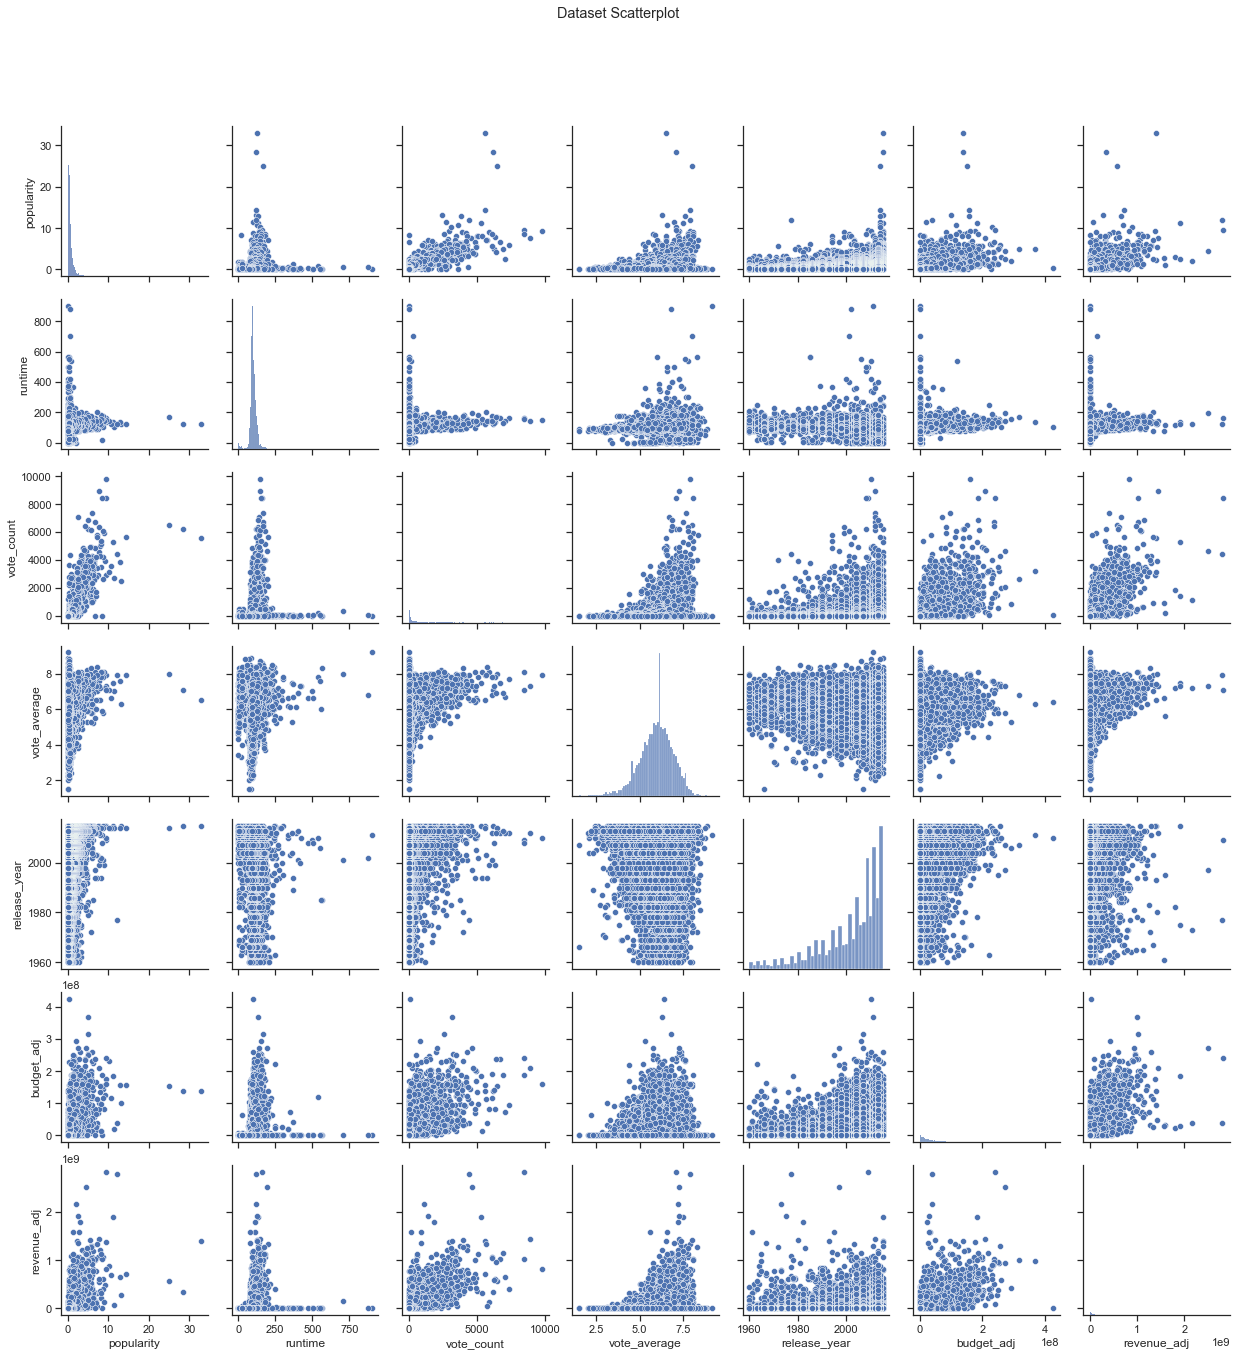

In [16]:
sns.set_theme(style="ticks")

g = sns.pairplot(df_clean)
g.fig.suptitle("Dataset Scatterplot", y=1.08) 

### Insights from the graph
 - A recognizable increase in budjet over years
 - Vote average range interval increases over years
 - Vote count increases over years
 - There are few movies in the dataset in the 60s and 70s
 - There is a slightly positive correlation between vote count and popularity

<a id='eda'></a>
# Exploratory Data Analysis

## Research Questions
 - Visualize summary statistics
 - Relation between genre and popularity
 - Relation between genre and rating
 - Relation between genre and budget
 - Relation between genre and revenue
 - Most popular movies director names 70s
 - Most popular movies director names 90s
 - Most popular movies director names 2000s
 - Plotting the previous three decades together
 - Relation between popularity and rating considering genres
 - Visualizing Revenue each year

### Visualize summary statisics

In [12]:
df_clean.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- Most of the movies are between 0.2 and 0.7 in popularity with outliers reaching up to 32 in popularity.
- 50% of the movies are between 5.4 and 6 in rating
- 50% of the movies are between 17 and 38 vote counts with 25% between 10 and 17.

### Relation between genre and popularity

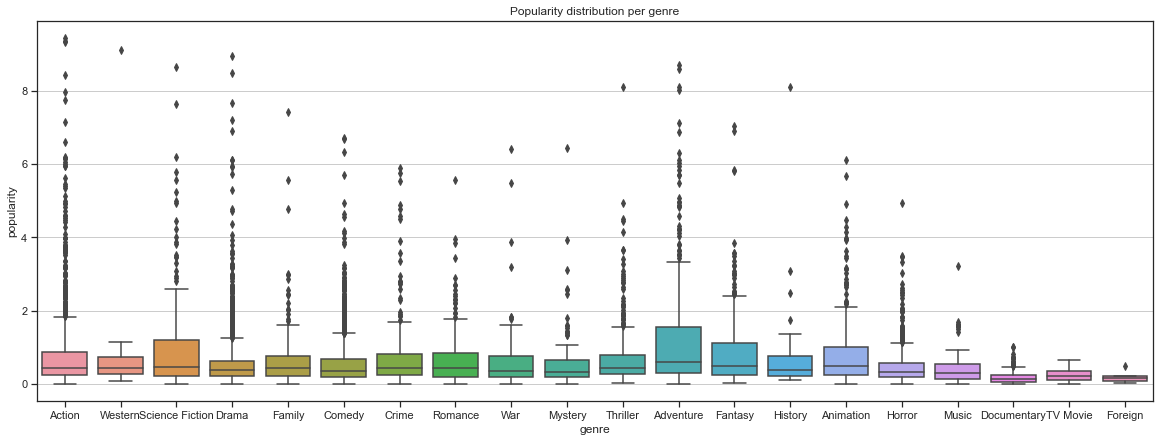

In [23]:
plt.figure(figsize=(20,7))
plt.grid()
g = sns.boxplot(x  = 'genre', y = 'popularity', data = df_clean[df_clean['popularity'] <= 10]).set_title('Popularity distribution per genre')

- Most of the movies across time are under 2 in popularity.
- Top popular genres are Adventure, Science Fiction, Fantasy and Action.

In [25]:
genre_grouped = pd.DataFrame(df_clean['genre'].value_counts())
genre_grouped.head()

,genre
Drama,2453
Comedy,2319
Action,1590
Horror,915
Adventure,586


Text(0.5, 1.0, 'genre count')

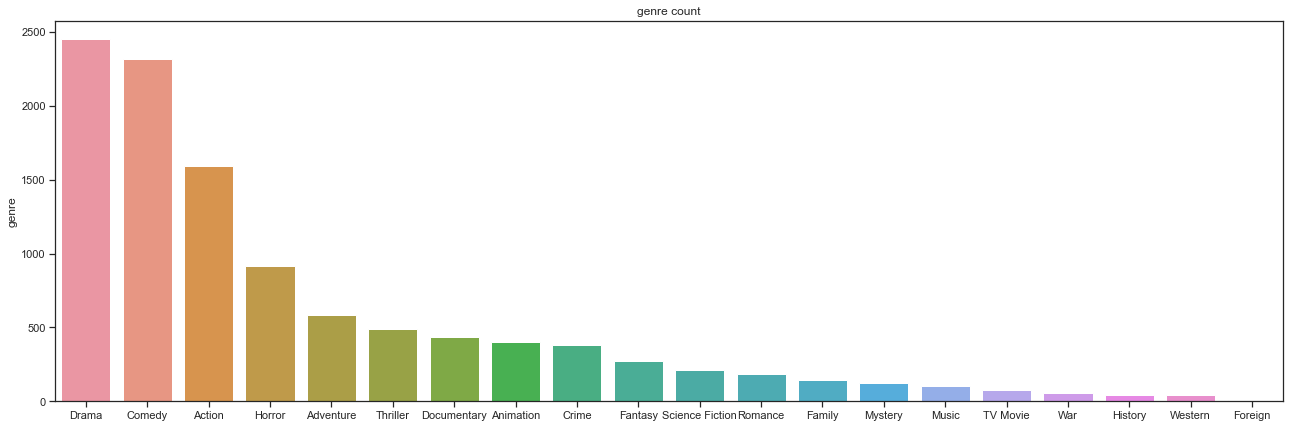

In [27]:
plt.figure(figsize=(22,7))
sns.barplot(data = genre_grouped, x =  genre_grouped.index, y = 'genre').set_title('genre count')

- Drama has the most frequent presence in the genres' first name followed by Comedy and Action.

### Relation between genre and rating

Text(0.5, 1.0, 'Vote Average distribution per genre')

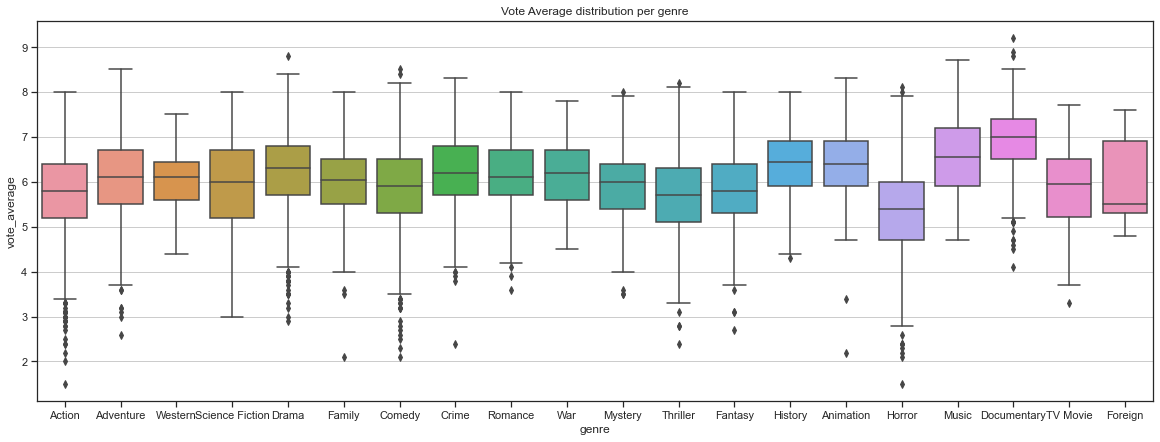

In [28]:
plt.figure(figsize=(20,7))
plt.grid()
sns.boxplot(x  = 'genre', y = 'vote_average', data = df_clean).set_title('Vote Average distribution per genre')

- Most of Action, comedy, Thriller, Fantasy and Horror movies are under 5.5 rating with horror movies on the top of this list.
- Approximately 50% of the Drama genre is above 6.5 in Rating which is impressive regarding its frequent presence in the genres' first name

### Relation between genre and budget

Text(0.5, 1.0, 'Budget distribution per genre')

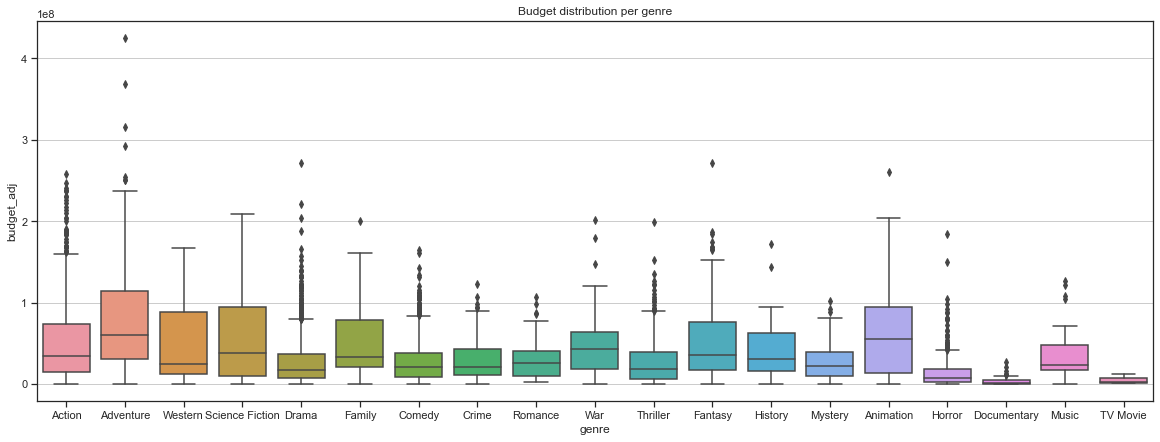

In [56]:
plt.figure(figsize=(20,7))
plt.grid()
sns.boxplot(x  = 'genre', y = 'budget_adj', data = df_clean[df_clean['budget_adj'] > 0]).set_title('Budget distribution per genre')

- The highest budget is the Adventure genre and Animation
- Most of Drama movies are relatively low budget but with lots  of outliers

### Relation between genre and revenue

Text(0.5, 1.0, 'Revenue distribution per genre')

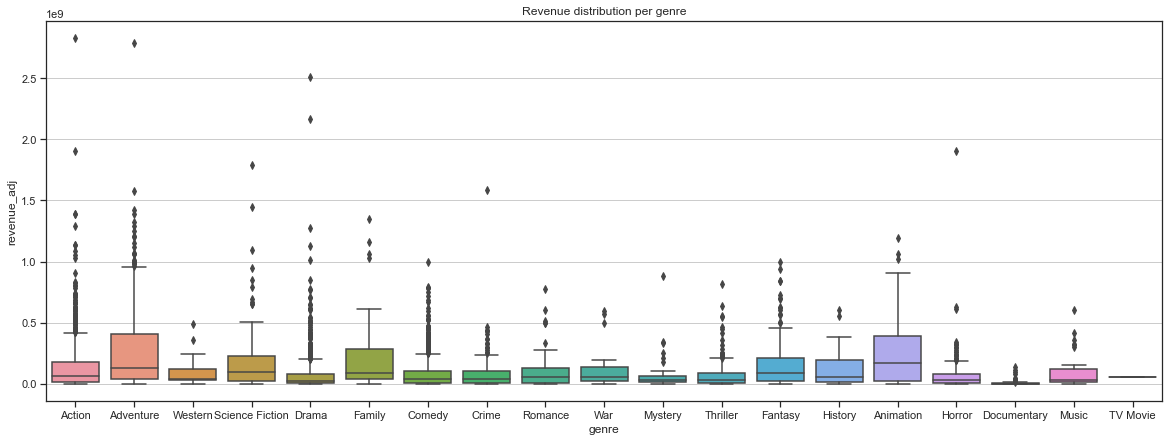

In [35]:
plt.figure(figsize=(20,7))
plt.grid()
sns.boxplot(x  = 'genre', y = 'revenue_adj', data = df_clean[df_clean['revenue_adj'] > 0]).set_title('Revenue distribution per genre')

- Clearly Animation is Higher in revenue than Adventure

### Most popular movies director names 70s

In [37]:
svnties = df_clean[(df_clean['release_year'] >= 1970) & (df_clean['release_year'] <1980)]

Text(0.5, 1.0, 'Popularity probability density distribution')

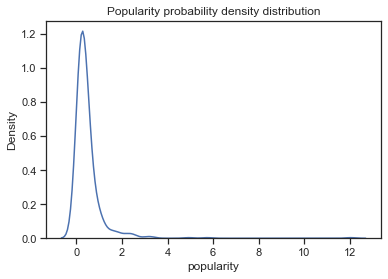

In [38]:
sns.kdeplot(data = svnties, x = 'popularity').set_title('70s Popularity probability density distribution')

##### In conclusion we are taking scores approximately above 1.5

In [39]:
pop_dir_svnties = svnties[svnties['popularity'] > 1.5]
pop_dir_svnties[['director', 'original_title', 'vote_average', 'popularity', 'tagline']]

,director,original_title,vote_average,popularity,tagline
1329,George Lucas,Star Wars,7.9,12.037933,"A long time ago in a galaxy far, far away..."
1330,Lewis Gilbert,The Spy Who Loved Me,6.2,2.379469,It's the BIGGEST. It's the BEST. It's BOND. An...
1331,John Lounsbery|Wolfgang Reitherman|Art Stevens,The Rescuers,6.6,1.719385,Two tiny agents vs. the world's wickedest woma...
7269,Francis Ford Coppola,The Godfather,8.3,5.738034,An offer you can't refuse.
7825,Ridley Scott,Alien,7.6,4.935897,In space no one can hear you scream.
7826,Francis Ford Coppola,Apocalypse Now,7.8,2.319520,This is the end...
7827,George Miller,Mad Max,6.5,2.012021,The Maximum Force Of The Future
7828,Robert Wise,Star Trek: The Motion Picture,6.0,1.823058,The human adventure is just beginning.
7829,Lewis Gilbert,Moonraker,5.7,1.691143,Outer space now belongs to 007.
9758,Francis Ford Coppola,The Godfather: Part II,8.1,3.264571,"I don't feel I have to wipe everybody out, Tom..."


 ### Most popular movies director names 90s

In [40]:
ninties = df_clean[(df_clean['release_year'] >= 1990) & (df_clean['release_year'] <2000)]

Text(0.5, 1.0, '90s Popularity probability density distribution')

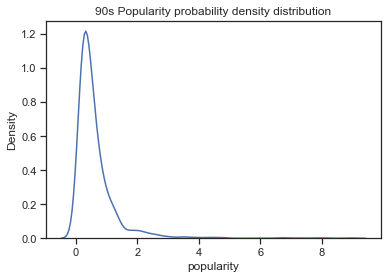

In [41]:
sns.kdeplot(data = ninties, x = 'popularity').set_title('90s Popularity probability density distribution')

##### In conclusion we are taking scores approximately above 2.5

In [42]:
pop_dir_ninties = ninties[ninties['popularity'] > 2.5]
pop_dir_ninties[['director', 'original_title', 'vote_average', 'popularity', 'tagline']]

,director,original_title,vote_average,popularity,tagline
2409,David Fincher,Fight Club,8.1,8.947905,How much can you know about yourself if you've...
2410,Lilly Wachowski|Lana Wachowski,The Matrix,7.8,7.753899,Welcome to the Real World.
2411,Sam Mendes,American Beauty,7.7,3.555720,Look closer.
2412,George Lucas,Star Wars: Episode I - The Phantom Menace,6.3,3.526029,Every generation has a legend. Every journey h...
2413,Stephen Sommers,The Mummy,6.3,2.943770,The legend you know. The adventure you have ye...
2414,Frank Darabont,The Green Mile,8.0,2.719461,Miracles do happen.
2415,M. Night Shyamalan,The Sixth Sense,7.5,2.578731,Not every gift is a blessing.
4177,Quentin Tarantino,Pulp Fiction,8.1,8.093754,Just because you are a character doesn't mean ...
4178,Frank Darabont,The Shawshank Redemption,8.4,7.192039,Fear can hold you prisoner. Hope can set you f...
4179,Robert Zemeckis,Forrest Gump,8.1,6.715966,"The world will never be the same, once you've ..."


### Most popular movies director names 2000s

In [43]:
millinia = df_clean[(df_clean['release_year'] >= 2000) & (df_clean['release_year'] <2010)]

Text(0.5, 1.0, '2000s Popularity probability density distribution')

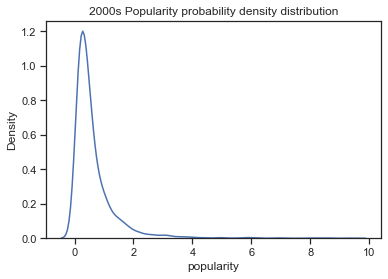

In [44]:
sns.kdeplot(data = millinia, x = 'popularity').set_title('2000s Popularity probability density distribution')

##### In conclusion we are taking scores approximately above 2.5

In [45]:
pop_dir_millinia = millinia[millinia['popularity'] > 2.5]
pop_dir_millinia[['director', 'original_title', 'vote_average', 'popularity', 'tagline']]

,director,original_title,vote_average,popularity,tagline
1386,James Cameron,Avatar,7.1,9.432768,Enter the World of Pandora.
1387,Quentin Tarantino,Inglourious Basterds,7.7,6.098027,Once upon a time in Nazi occupied France...
1388,Patrick Tatopoulos,Underworld: Rise of the Lycans,6.2,5.806897,Every war has a beginning.
1389,David Yates,Harry Potter and the Half-Blood Prince,7.3,5.076472,Dark Secrets Revealed
1390,Bob Peterson|Pete Docter,Up,7.6,4.908902,Fly Up to Venezuela
...,...,...,...,...,...
7394,Sam Raimi,Spider-Man 3,5.8,2.520912,The battle within.
7395,Frank Darabont,The Mist,6.6,2.510571,"Belief divides them, mystery surrounds them, b..."
8661,Ridley Scott,Gladiator,7.7,4.271452,A Hero Will Rise.
8662,Christopher Nolan,Memento,7.9,3.095625,Some memories are best forgotten.


### Plotting the previous three decades together

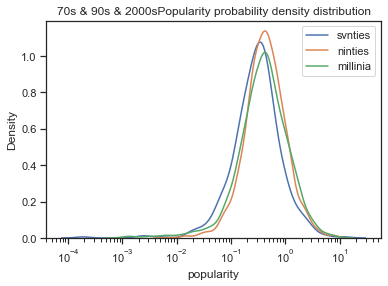

In [49]:
sns.kdeplot(data = svnties, x = 'popularity', log_scale=True)
sns.kdeplot(data = ninties, x = 'popularity', log_scale=True)
sns.kdeplot(data = millinia, x = 'popularity', log_scale=True).set_title('70s & 90s & 2000sPopularity probability density distribution')
plt.legend(labels=['svnties','ninties','millinia'])


- The popularity ratings was clearly better than the 70s and 2000s

In [32]:
df_clean[df_clean['popularity']  == df_clean['popularity'].max()]

,popularity,original_title,cast,director,tagline,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action


### Relation between popularity and rating considering genres

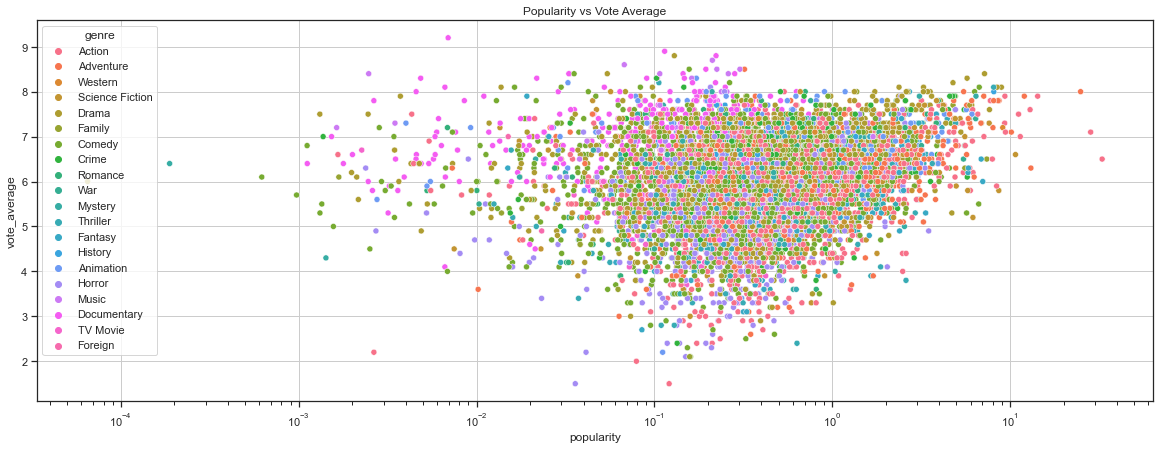

In [51]:
plt.figure(figsize=(20,7))
plot = sns.scatterplot(data = df_clean, x = 'popularity', y= 'vote_average', hue = 'genre' )
plot.set_title('Popularity vs Vote Average')
plot.set(xscale = "log")
plot.grid()

- There is a positive correlation between popularity and rating

### Visualizing each year revenue

In [53]:
data = df_clean.groupby('release_year').sum()
data.head()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,
1960,14.685834,3541,2481,202.4,1.626252e+08,1.069117e+09
1961,13.107641,3702,2405,197.6,3.365630e+08,2.463622e+09
1962,14.553069,3979,2392,203.0,3.944616e+08,1.553996e+09
1963,17.092019,3785,2816,215.2,5.221334e+08,1.334357e+09
1964,17.321989,4587,3137,260.9,2.775772e+08,2.397193e+09


Text(0.5, 1.0, 'Total revenue overtime')

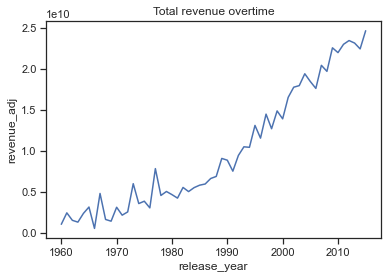

In [54]:
sns.lineplot(data = data, x = data.index, y = 'revenue_adj').set_title('Total revenue overtime')

- There is a consistent increase of revenue overtime

<AxesSubplot:xlabel='release_year', ylabel='revenue_adj'>

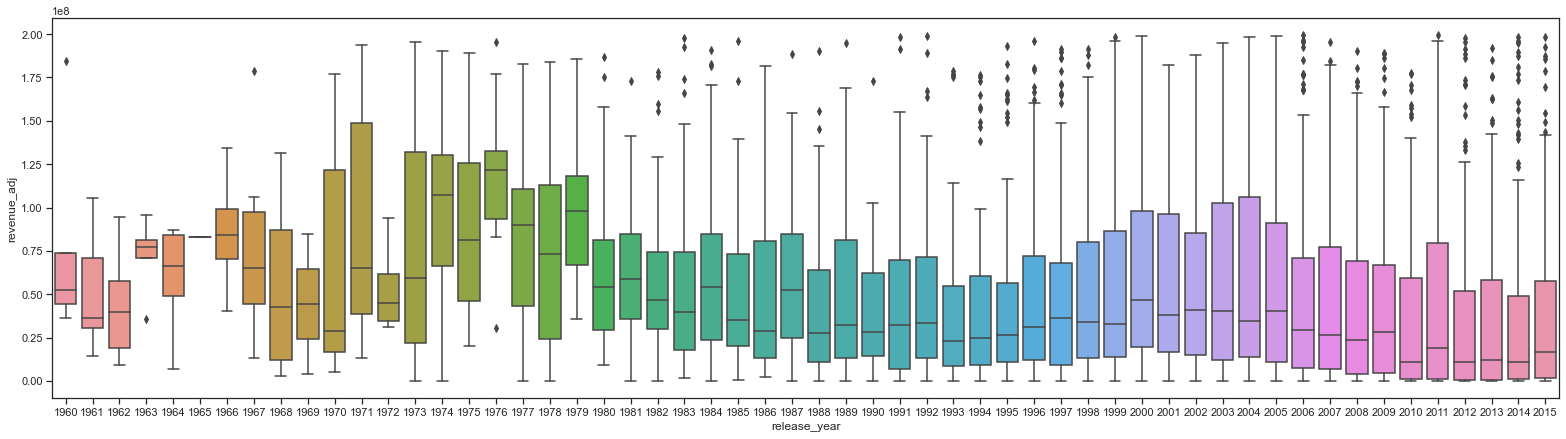

In [55]:
plt.figure(figsize=(27,7))
sns.boxplot(data = df_clean[(df_clean['revenue_adj']<200000000) & (df_clean['revenue_adj'] > 0)], x = 'release_year', y = 'revenue_adj')

- The revenue is not very reliable as there are a lot of missing data, but from the visualization it appears that the highest revenue was at the 70s

<a id='conclusions'></a>
## Conclusions

From the summary statistics it is clear that most of the movies are between 0.2 and 0.7 in popularity with outliers reaching up to 32 in popularity.
Most of the globally recognized movies are above 2 in popularity but not necessarily high in rating and most all of them are outliers.
But most of the movies across time are under 2 in popularity.
Top popular genres are Adventure, Science Fiction, Fantasy and Action.
There are lots of unpopular action movies.
First name appear genre is mostly drama, comedy and action respectively
Most of Action, comedy, Thriller, Fantasy and Horror movies are under 5.5 rating with horror movies on the top of this list.

Approximately 50% of the Drama genre is above 6.5 in Rating which is impressive regarding its frequent presence in the genres' first name, and also not having a very high budget
Highest budget genre that stands out is the adventure genre but also high in revenue
The revenue is not very reliable as there are a lot of missing data, but from the visualization it appears that the highest revenue was at the 70s however, if you took a look at the two plots in the 'Visualizing each year revenue' section you will observe a strange phenomenon, it appears in the line plot that the revenue increased as time goes on, which may be true, but looking at the boxplot, there are clearly a lot of outliers as the years approach 2015 and with very high revenue values which can be misleading. 
